   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


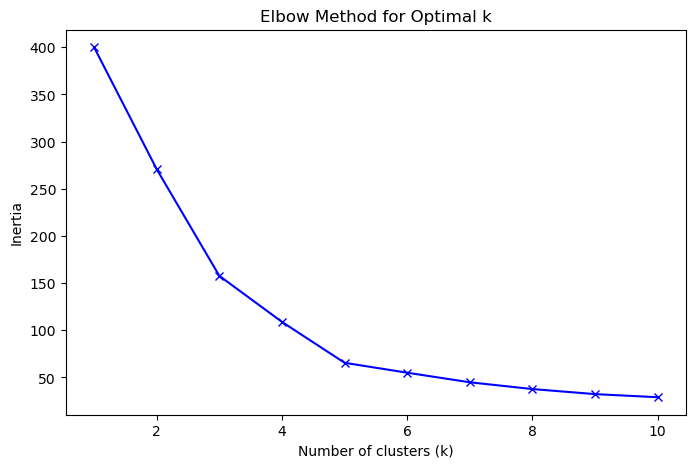

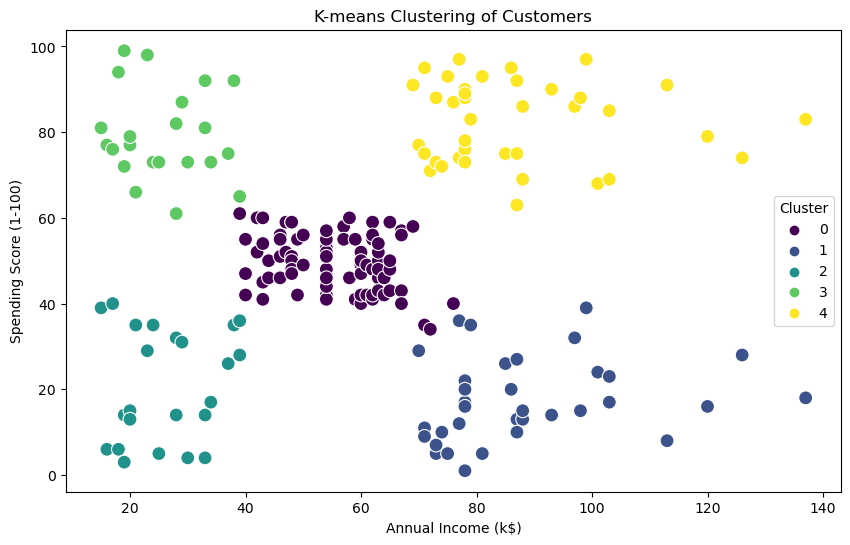

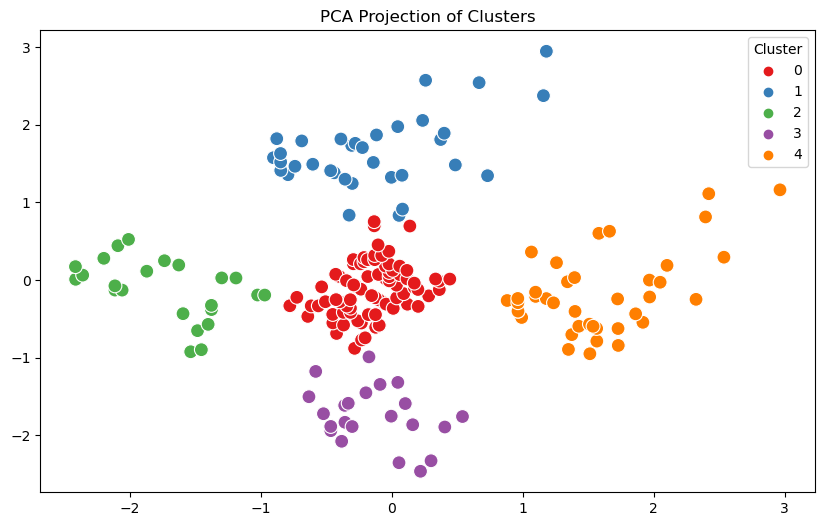

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                  15                      39        2
1             2                  15                      81        3
2             3                  16                       6        2
3             4                  16                      77        3
4             5                  17                      40        2
..          ...                 ...                     ...      ...
195         196                 120                      79        4
196         197                 126                      28        1
197         198                 126                      74        4
198         199                 137                      18        1
199         200                 137                      83        4

[200 rows x 4 columns]


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Preview dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Feature selection
# Let's consider 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means clustering with the optimal number of clusters (let's assume 5 clusters from the Elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Optional: Visualize clusters in 3D using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('PCA Projection of Clusters')
plt.show()

# Display clustered data
print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])
